In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 분류 실습 : Credit Card Fraud Detection

- 다양한 Feature Engineering 방식 적용
- Logistic Regression과 LightGBM 이용

### Kaggle의 신용카드 데이터 세트

- 데이터 다운로드 : https://www.kaggle.com/mlg-ulb/creditcardfraud  


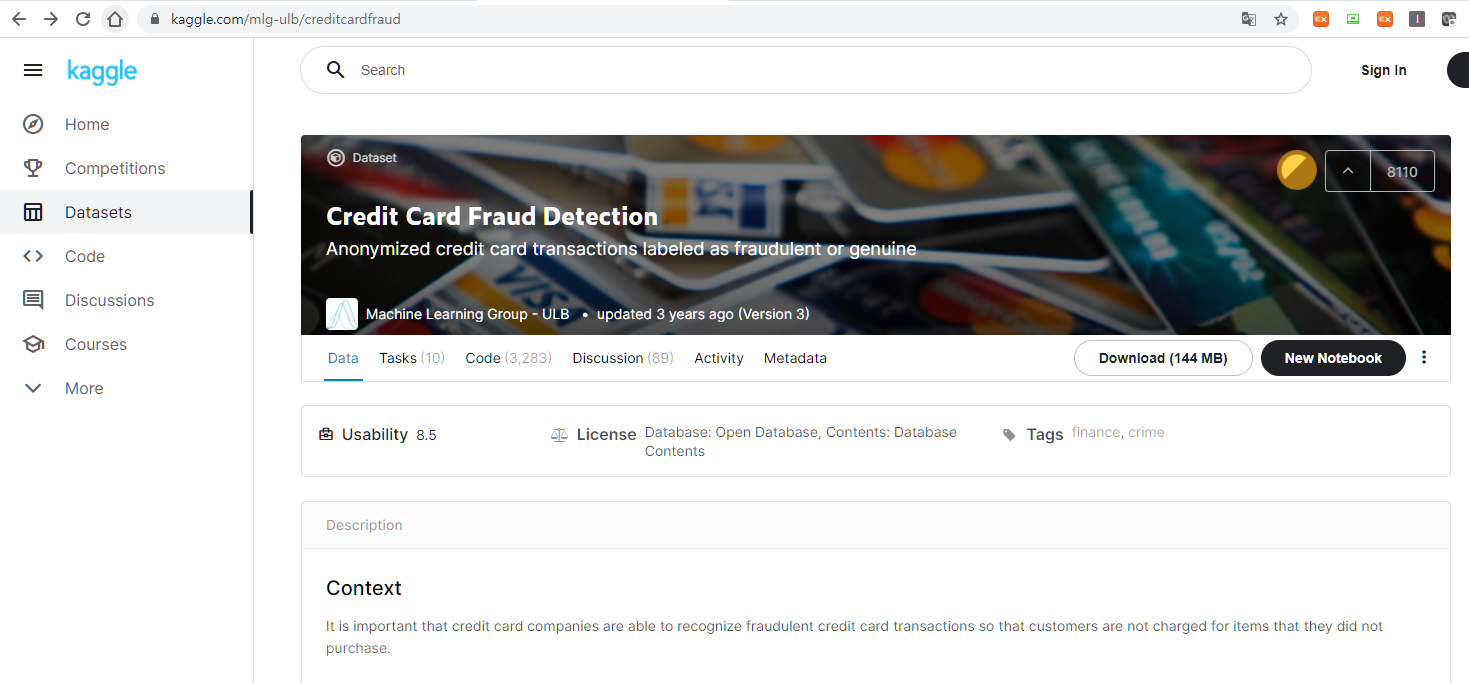

- 개인의 민감한 정보를 보호하기 위해 PCA 차원축소로 변환된 데이터(v1~v28)로 구성

- 차원축소
    - 많은 피처들(변수)로 구성된 데이터셋을 차원 축소하여 재구성
    - PCA(주성분 분석): 독립적 관계를 차원 변환(가장 높은 분산을 가지는 데이터 축을 찾아 차원 축소)
- 데이터 변환
    - 비대칭: 오른쪽으로 꼬리가 긴 분포(큰값이 많은 경우) -> 로그변환
    - 이상치 탐지
- 데이터 샘플링
    - 불균형한 데이터 보완: 클래스 간의 불균형(imbalanced dataset)
    - 오버 샘플링 VS 언더 샘플링
    - 오버 샘플링 방식: SMOTE

## 1. 데이터 일차 가공 및 모델 학습/예측/평가

### 'creditcard.csv' 파일 데이터 로드

In [2]:
card_df = pd.read_csv('data/creditcard.csv')
print(f'데이터 크기: {card_df.shape}')
card_df.head(3)

데이터 크기: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


**creditcard 피처 정보**
- Time : 데이터 생성 관련한 속성으로 분석에 큰 의미가 없음 => 삭제
- Amount : 신용카드 트랜잭션 금액
- Class : 레이블, 0-정상, 1-사기

In [5]:
card_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
card_df['Class'].value_counts() / card_df.Class.count() * 100

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

In [7]:
card_df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

### 전처리 함수 ① : get_preprocessed_df() 작성 

- 원본 DataFrame은 유지하고 데이터 가공을 위한 DataFrame을 복사하여 반환

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
def get_preprocessed_df(df= None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

### 학습과 테스트 데이터 세트를 반환하는 함수 생성
- 사전 데이터 처리가 끝난 뒤 해당 함수 호출

**`get_train_test_dataset(df=None)`**

In [10]:
# 훈련, 테스트로 나누면, target(0,1)의 비율이 달라진다. -> stratify=y로 원 데이터 target의 비율로 맞추어 분류

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    x = df_copy.iloc[:,:-1]
    y = df_copy.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,
                                                       random_state=0,
                                                       stratify=y)
    return x_train, x_test, y_train, y_test 

In [11]:
x_train, x_test, y_train, y_test = get_train_test_dataset(card_df)

In [12]:
card_df['Class'].value_counts() / card_df.Class.count() * 100

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

In [13]:
y_train.value_counts() / y_train.count() * 100

Class
0    99.827451
1     0.172549
Name: count, dtype: float64

In [14]:
y_test.value_counts() / y_test.count() * 100

Class
0    99.826785
1     0.173215
Name: count, dtype: float64

**LogisticRegression 알고리즘 적용하여 학습/예측/평가 수행**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, roc_curve, classification_report

# 이진 분류 모델의 성능지표
def get_eval_score(test_y, pred, pred_proba_c1= None):
    
    # 혼동행렬(오차행렬)
    confusion = confusion_matrix(test_y, pred)
    # 정밀도(precision)
    precision = precision_score(test_y, pred)
    # 정확도(accuracy_score)
    accuracy = accuracy_score(test_y, pred)
    # 재현율(recall)
    recall = recall_score(test_y, pred)
    # F1 score
    f1 = f1_score(test_y, pred)
    # G-measure -> 정밀도와 재현율의 기하평균 -> np.sqrt(recall_socre*precision_score)
    g = np.sqrt(recall_score(test_y, pred)*precision_score(test_y, pred))

    print(f'confusion matrix:\n{confusion}\n')
    print(f'accuracy: {accuracy:.4f}, precision: {precision:.4f}, recall: {recall:.4f}',end=' ')
    print(f'F1: {f1:.4f}, G: {g:.4f}')
    if pred_proba_c1 is not None:
        auc = roc_auc_score(test_y, pred_proba_c1)
        print(f'auc: {auc:.4f}')

def plot_importance_top(clf, feature_names,top_n=None):
    importances = pd.Series(clf.feature_importances_, index = feature_names)
    sort_ = importances.sort_values(ascending= False)

    if top_n:
        top_ftr = sort_[:top_n]
        top = 'Top' + str(top_n)
    else:
        top_ftr = sort_
        top = 'All'

    sns.barplot(x=top_ftr, y= top_ftr.index)
    plt.title('Feature Importances')
    plt.show()

In [16]:
lr_clf = LogisticRegression(max_iter= 1000)
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
lr_pred_proba = lr_clf.predict_proba(x_test)[:,1]
get_eval_score(y_test, lr_pred, lr_pred_proba)

confusion matrix:
[[85281    14]
 [   56    92]]

accuracy: 0.9992, precision: 0.8679, recall: 0.6216 F1: 0.7244, G: 0.7345
auc: 0.9704


#### 모델을 학습/예측/평가를 위한 함수 생성
: 앞으로 피처 엔지니어링을 수행할 때마다 사용

`get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None)`

In [17]:
# 이진분류
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    print(f'{model.__class__.__name__} 결과')
    get_eval_score(tgt_test, pred, pred_proba)

In [18]:
get_model_train_eval(lr_clf, x_train, x_test, y_train, y_test)

LogisticRegression 결과
confusion matrix:
[[85281    14]
 [   56    92]]

accuracy: 0.9992, precision: 0.8679, recall: 0.6216 F1: 0.7244, G: 0.7345
auc: 0.9704


#### LightGBM 학습/예측/평가

In [19]:
# boost_from_average: 2.1버전 이상에서 극도로 불균형한 분포를 갖는 
#                      데이터에 대한 예측성능이 저하되는 현상을 방지하기 위해
#                         False로 설정
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators= 1000, num_leaves = 64,
                         n_jobs= -1, boost_from_average= False)

get_model_train_eval(lgbm_clf, x_train, x_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

- LogisticRegression:
    - accuracy: 0.9992, precision: 0.8679, recall: 0.6216 F1: 0.7244, G: 0.7345 auc: 0.9704

- LightGBM:
    - accuracy: 0.9995, precision: 0.9573, recall: 0.7568 F1: 0.8453, G: 0.8511 auc: 0.9790

## 2. 데이터 분포도 변환 후 모델 학습/예측/평가

### 중요 feature의 분포도 확인

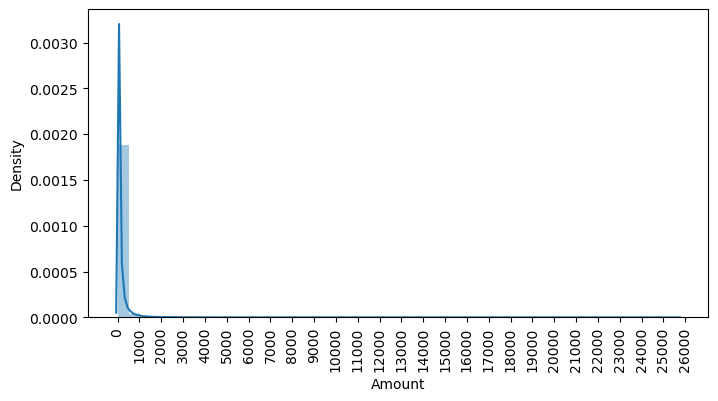

In [20]:
plt.figure(figsize=(8,4))
sns.distplot(card_df.Amount)
plt.xticks(range(0,27000, 1000), rotation=90)
plt.show()

### 전처리 함수 ② get_preprocessed_df() 수정
- StandardScaler를 이용하여 Amount 피처 변환 추가

In [22]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df= None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount = scaler.fit_transform(df_copy.Amount.values.reshape(-1,1))
    
    df_copy.insert(0,'Amount_scaled', amount) # = df_copy['Amount_scaled'] = amount
    df_copy.drop(['Amount','Time'], axis=1, inplace=True)
    return df_copy

In [23]:
card_df2 = get_preprocessed_df(card_df)
card_df2.head(3)

,Amount_scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0


**StandardScaler 변환 후 로지스틱 회귀 및 LightGBM 학습/예측/평가**

In [25]:
lr_clf2 = LogisticRegression(max_iter=1000)
lgbm_clf2 = LGBMClassifier(n_estimators= 1000, num_leaves = 64,
                         n_jobs= -1, boost_from_average= False)

x_train, x_test, y_train, y_test = get_train_test_dataset(card_df)
print('### amount 표준화한 경우 ###')
get_model_train_eval(lr_clf2, x_train, x_test, y_train, y_test)
get_model_train_eval(lgbm_clf2, x_train, x_test, y_train, y_test)

### amount 표준화한 경우 ###
LogisticRegression 결과
confusion matrix:
[[85281    14]
 [   58    90]]

accuracy: 0.9992, precision: 0.8654, recall: 0.6081 F1: 0.7143, G: 0.7254
auc: 0.9702
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

- LogisticRegression:
    - accuracy: 0.9992, precision: 0.8679, recall: 0.6216 F1: 0.7244, G: 0.7345 auc: 0.9704
- LightGBM:
    - accuracy: 0.9995, precision: 0.9573, recall: 0.7568 F1: 0.8453, G: 0.8511 auc: 0.9790
<br><br> 
- LogisticRegression: amount 표준화
    - accuracy: 0.9992, precision: 0.8654, recall: 0.6081 F1: 0.7143, G: 0.7254 auc: 0.9702
- LightGBM: amount 표준화
    - accuracy: 0.9995, precision: 0.9569, recall: 0.7500 F1: 0.8409, G: 0.8472 auc: 0.9779

- 표준화된 Amount 시각화

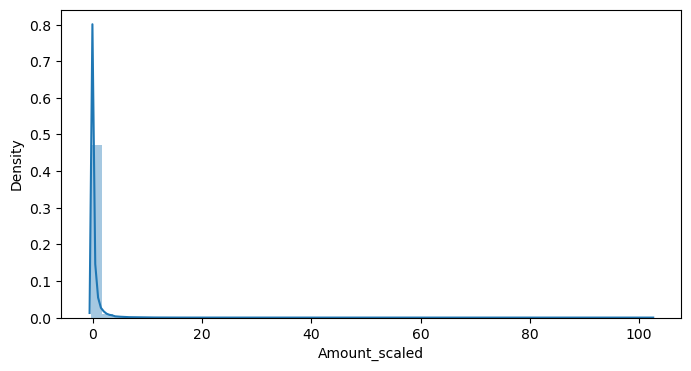

In [27]:
plt.figure(figsize=(8,4))
sns.distplot(card_df2.Amount_scaled)
plt.show()

=> 표준화로 Amount 변환 후 로지스틱회귀는 정밀도, 재현율 변화가 없고, LGBM은 모두 안좋아짐

### 전처리 함수 ③ : get_preprocessed_df() 수정
- 비대칭 분포를 갖는 Amount 피처를 로그 변환

In [33]:
# log1p -> log변환 후 + 1 -> log만 하면 0에 가까울수록 -무한대에 빠진다.
def get_preprocessed_df(df= None):
    df_copy = df.copy()
    amount = np.log1p(df_copy.Amount)
    df_copy.insert(0,'Amount_scaled', amount) # = df_copy['Amount_scaled'] = amount
    df_copy.drop(['Amount','Time'], axis=1, inplace=True)
    return df_copy

#### log1p

In [31]:
# log1p -> log변환 후 + 1 -> log만 하면 0에 가까울수록 -무한대에 빠진다.

print(1e-1000 == 0.0)
np.log(1e-1000) # output = -inf
np.log1p(1e-1000) # output = 0.0

True


0.0

---

**Amount 피처 로그 변환한 뒤 로지스틱회귀, LightGBM 학습/예측/평가**

In [34]:
lr_clf3 = LogisticRegression(max_iter=1000)
lgbm_clf3 = LGBMClassifier(n_estimators= 1000, num_leaves = 64,
                         n_jobs= -1, boost_from_average= False)

x_train, x_test, y_train, y_test = get_train_test_dataset(card_df)
print('### amount 로그변환한 경우 ###')
get_model_train_eval(lr_clf3, x_train, x_test, y_train, y_test)
get_model_train_eval(lgbm_clf3, x_train, x_test, y_train, y_test)

### amount 로그변환한 경우 ###
LogisticRegression 결과
confusion matrix:
[[85283    12]
 [   59    89]]

accuracy: 0.9992, precision: 0.8812, recall: 0.6014 F1: 0.7149, G: 0.7279
auc: 0.9727
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

|model|변환|accuracy|precision|recall|F1|G|AUC|
|---|---|---|---|---|---|---|---|
|LogisticRegression| |0.9992|0.8679|0.6216|0.7244|0.7345|0.9704|
|LightGBM| |0.9995|0.9573|0.7568|0.8453|0.8511|0.9790|
|LogisticRegression|amount 표준화|0.9992|0.8654|0.6081|0.7143|0.7254|0.9702|
|LightGBM|amount 표준화|0.9995|0.9569|0.7500|0.8409|0.8472|0.9779|
|LogisticRegression|amount 로그변환|0.9992|0.8812|0.6014|0.7149|0.7279|0.9727|
|LightGBM|amount 로그변환|0.9995|0.9576|0.7635|0.8496|0.8551|0.9796|

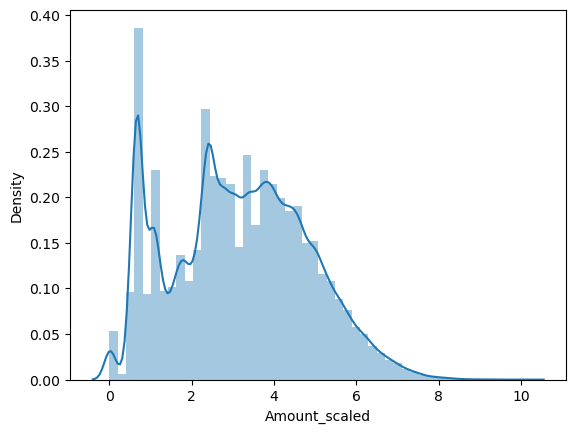

In [35]:
card_df3 = get_preprocessed_df(card_df)
sns.distplot(card_df3.Amount_scaled)
plt.show()

## 3. 이상치 데이터 제거 후 모델 학습/예측/평가

###  각 피처들의 상관 관계 시각화 : 히트맵(heatmap)

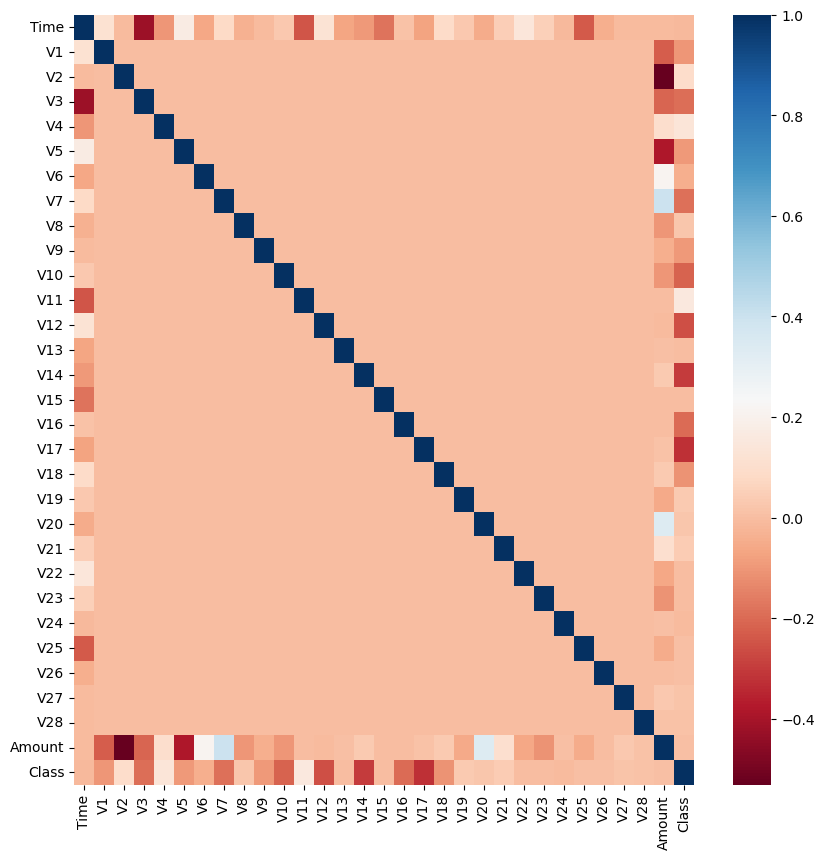

In [40]:
plt.figure(figsize=(10,10))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')
plt.show()

### 이상치 필터링을 위한 함수 작성 : get_outlier()
- Dataframe에서 outlier에 해당하는 데이터를 필터링
- outlier 레코드의 index를 반환함

In [41]:
# class=1인 데이터에서 이상치 탐지
def get_outlier_index(df, column, weight=1.5):
    fraud = df[df.Class == 1][column]
    q1 = np.percentile(fraud.values, 25)
    q3 = np.percentile(fraud.values, 75)
    IQR = q3 - q1
    IQR_weight = IQR * weight
    lw = q1 - IQR_weight
    up = q3 + IQR_weight
    out_idx = fraud[(fraud < lw) | (fraud > up)].index
    return out_idx

In [42]:
get_outlier_index(card_df, 'V14')

Index([8296, 8615, 9035, 9252], dtype='int64')

In [47]:
card_df['V14'][[8296, 8615, 9035, 9252]]

8296   -19.214325
8615   -18.822087
9035   -18.493773
9252   -18.049998
Name: V14, dtype: float64

#### 피처 V14의 분포:  사분위수

In [48]:
np.percentile(card_df.V14,25), np.percentile(card_df.V14,75)

(-0.4255740124549935, 0.493149849218149)

In [49]:
card_df.V14.describe()

count    2.848070e+05
mean     1.207294e-15
std      9.585956e-01
min     -1.921433e+01
25%     -4.255740e-01
50%      5.060132e-02
75%      4.931498e-01
max      1.052677e+01
Name: V14, dtype: float64

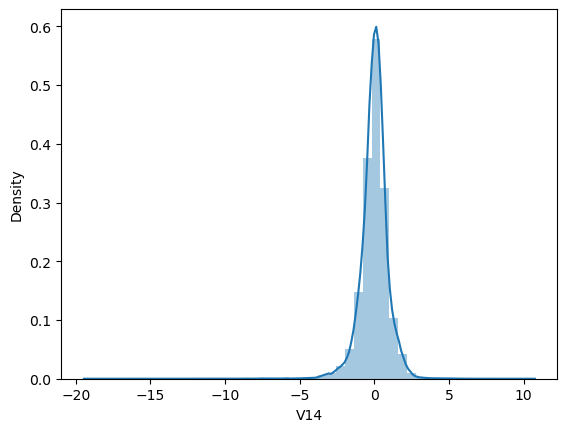

In [50]:
sns.distplot(card_df.V14)
plt.show()

### 전처리 함수 ④ : get_processed_df( )
- Amount 피처 로그 변환
- V14 피처의 이상치 데이터 삭제

In [51]:
def get_preprocessed_df(df= None):
    df_copy = df.copy()
    amount = np.log1p(df_copy.Amount)
    df_copy.insert(0,'Amount_scaled', amount) # = df_copy['Amount_scaled'] = amount
    df_copy.drop(['Amount','Time'], axis=1, inplace=True)
    out_idx = get_outlier_index(df_copy, 'V14', 1.5)
    df_copy.drop(out_idx, axis=0, inplace=True)
    return df_copy

### 로그변환, 이상치 제거 후 모델들을 재 학습/예측/평가

In [52]:
lr_clf4 = LogisticRegression(max_iter=1000)
lgbm_clf4 = LGBMClassifier(n_estimators= 1000, num_leaves = 64,
                         n_jobs= -1, boost_from_average= False)

x_train, x_test, y_train, y_test = get_train_test_dataset(card_df)
print('### V14 이상치 제거, amount 로그변환한 경우 ###')
get_model_train_eval(lr_clf4, x_train, x_test, y_train, y_test)
get_model_train_eval(lgbm_clf4, x_train, x_test, y_train, y_test)

### amount V14 이상치 제거, 로그변환한 경우 ###
LogisticRegression 결과
confusion matrix:
[[85281    14]
 [   48    98]]

accuracy: 0.9993, precision: 0.8750, recall: 0.6712 F1: 0.7597, G: 0.7664
auc: 0.9743
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

|model|변환|accuracy|precision|recall|F1|G|AUC|
|---|---|---|---|---|---|---|---|
|LogisticRegression| |0.9992|0.8679|0.6216|0.7244|0.7345|0.9704|
|LightGBM| |0.9995|0.9573|0.7568|0.8453|0.8511|0.9790|
|LogisticRegression|amount 표준화|0.9992|0.8654|0.6081|0.7143|0.7254|0.9702|
|LightGBM|amount 표준화|0.9995|0.9569|0.7500|0.8409|0.8472|0.9779|
|LogisticRegression|amount 로그변환|0.9992|0.8812|0.6014|0.7149|0.7279|0.9727|
|LightGBM|amount 로그변환|0.9995|0.9576|0.7635|0.8496|0.8551|0.9796|
|LogisticRegression|V14 이상치 제거, amount 로그변환|0.9993|0.8750|0.6712|0.7597|0.7664|0.9743|
|LightGBM|V14 이상치 제거, amount 로그변환|0.9996|0.9603|0.8288|0.8897|0.8921|0.9780|


## 4. SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

- 불균형한 데이터셋에서는 특정 클래스의 데이터가 다른 클래스에 비해 현저히 적어서 모델이 데이터의 분포를 제대로 학습하지 못할 수 있다.
- 오버샘플링은 언더샘플링과 함께 불균형 데이터 문제를 해결하는 데 사용
- 오버샘플링: 소수 클래스의 데이터를 인위적으로 늘려서 클래스 간의 균형을 맞추는 방법

- 무작위 복제(Random Over-Sampling): 소수 클래스의 데이터를 무작위로 복제하여 데이터 양을 늘립니다. 이 방법은 구현이 간단하지만, 중복된 데이터가 많아져서 모델이 과적합(overfitting)될 위험이 있습니다.

- SMOTE (Synthetic Minority Over-sampling Technique): 소수 클래스의 데이터 사이에 새로운 합성 데이터를 생성
- 새로운 데이터를 생성하여 데이터셋의 다양성을 높입니다.


In [54]:
import imblearn
imblearn.__version__

'0.11.0'

###  오버샘플링된 데이터로 로지스틱 회귀로 학습/예측/평가

In [58]:
# 학습데이터 만 오버샘플링 적용

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

print(f'SMOTE 적용 전 train shape:{x_train.shape, y_train.shape}')
print(f'SMOTE 적용 후 train shape:{x_train_over.shape, y_train_over.shape}')
print(f'SMOTE 적용 후 레이블 분포:\n{pd.Series(y_train_over).value_counts()}')

SMOTE 적용 전 train shape:((199362, 29), (199362,))
SMOTE 적용 후 train shape:((398040, 29), (398040,))
SMOTE 적용 후 레이블 분포:
Class
0    199020
1    199020
Name: count, dtype: int64


In [59]:
# 오버 샘플링을 통해 1의 값도 199020으로 만들었다.
print(y_train.value_counts())

Class
0    199020
1       342
Name: count, dtype: int64


In [61]:
# 오버 샘플링을 통해 비율을 50%로 동일하게 만들었다.
y_train_over.value_counts()/ y_train_over.count() * 100

Class
0    50.0
1    50.0
Name: count, dtype: float64

###  오버샘플링된 데이터로 로지스틱 회귀로 학습/예측/평가

In [62]:
lr_clf5 = LogisticRegression(max_iter=1000)

print('### V14 이상치 제거, amount 로그변환, 오버샘플링 ###')
get_model_train_eval(lr_clf5, x_train_over, x_test, y_train_over, y_test)

### V14 이상치 제거, amount 로그변환, 오버샘플링 ###
LogisticRegression 결과
confusion matrix:
[[82937  2358]
 [   11   135]]

accuracy: 0.9723, precision: 0.0542, recall: 0.9247 F1: 0.1023, G: 0.2238
auc: 0.9737


**Precision-Recall 곡선 시각화**

In [63]:
def precision_recall_curve_plot(test_y, pred_proba_c1):
    prec, rec, thres = precision_recall_curve(test_y, pred_proba_c1)    
    plt.plot(thres, prec[:-1], label='precision')
    plt.plot(thres, rec[:-1], label='recall',ls='--')
    plt.xlabel('threshold value')
    plt.ylabel('Precision & Recall value')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.legend()
    plt.grid()
    plt.show()

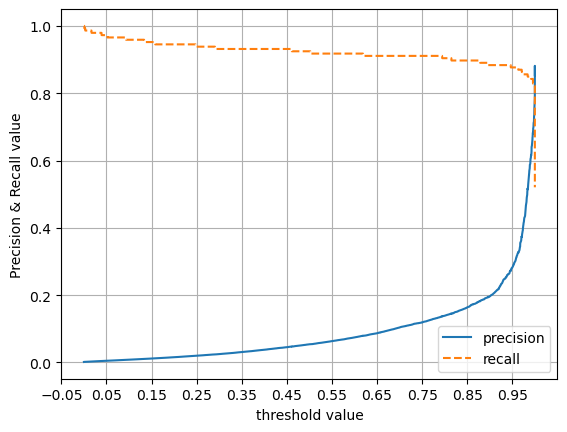

In [64]:
precision_recall_curve_plot(y_test, lr_clf5.predict_proba(x_test)[:,1])

### 오버샘플링된 데이터로 LightGBM 모델 적용

In [66]:
lgbm_clf5 = LGBMClassifier(n_estimators= 1000, num_leaves = 64,
                         n_jobs= -1, boost_from_average= False)
get_model_train_eval(lgbm_clf5, x_train_over, x_test, y_train_over, y_test)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.125124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

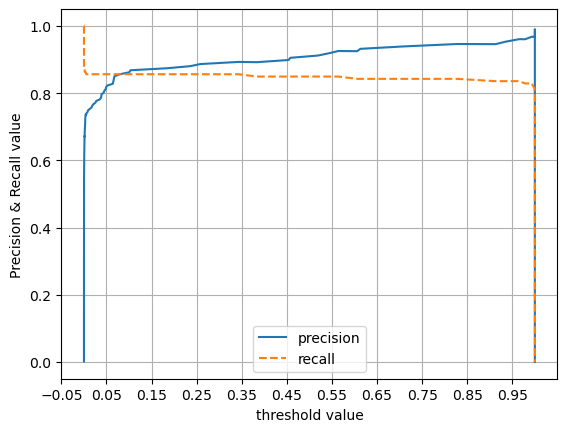

In [67]:
precision_recall_curve_plot(y_test, lgbm_clf5.predict_proba(x_test)[:,1])

|model|변환|accuracy|precision|recall|F1|G|AUC|
|---|---|---|---|---|---|---|---|
|LogisticRegression| |0.9992|0.8679|0.6216|0.7244|0.7345|0.9704|
|LightGBM| |0.9995|0.9573|0.7568|0.8453|0.8511|0.9790|
|LogisticRegression|amount 표준화|0.9992|0.8654|0.6081|0.7143|0.7254|0.9702|
|LightGBM|amount 표준화|0.9995|0.9569|0.7500|0.8409|0.8472|0.9779|
|LogisticRegression|amount 로그변환|0.9992|0.8812|0.6014|0.7149|0.7279|0.9727|
|LightGBM|amount 로그변환|0.9995|0.9576|0.7635|0.8496|0.8551|0.9796|
|LogisticRegression|V14 이상치 제거, amount 로그변환|0.9993|0.8750|0.6712|0.7597|0.7664|0.9743|
|LightGBM|V14 이상치 제거, amount 로그변환|0.9996|0.9603|0.8288|0.8897|0.8921|0.9780|
|LogisticRegression|V14 이상치 제거, amount 로그변환, 오버샘플링|0.9723|0.0542|0.9247|0.1023|0.2238|0.9737|
|LightGBM|V14 이상치 제거, amount 로그변환, 오버샘플링|0.9996|0.9118|0.8493|0.8794|0.8800|0.9814|

-------

### 정리
불균형 데이터인 경우 
1. 로그변환하면 성능이 더 좋아진다.
2. 이상치의 영향을 받는 경우 이상치를 제거하면 성능이 더 좋아진다.